In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Concatenate the datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Convert 'timestamp' to datetime format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], unit='s')


In [10]:
# Extract features from 'timestamp'
combined_df['year'] = combined_df['timestamp'].dt.year
combined_df['month'] = combined_df['timestamp'].dt.month
combined_df['day'] = combined_df['timestamp'].dt.day
combined_df['hour'] = combined_df['timestamp'].dt.hour

In [11]:
combined_df

,timestamp,value,is_anomaly,predicted,year,month,day,hour
0,2015-02-27 03:42:53,42.00000,False,44.072500,2015,2,27,3
1,2015-02-27 03:47:53,41.00000,False,50.709390,2015,2,27,3
2,2015-02-27 03:52:53,41.00000,False,81.405120,2015,2,27,3
3,2015-02-27 03:57:53,61.00000,False,39.950367,2015,2,27,3
4,2015-02-27 04:02:53,44.00000,False,35.350160,2015,2,27,4
...,...,...,...,...,...,...,...,...
19785,2014-04-14 23:35:00,20.00384,NaN,19.836240,2014,4,14,23
19786,2014-04-14 23:40:00,20.00384,NaN,19.207998,2014,4,14,23
19787,2014-04-14 23:45:00,20.00384,NaN,20.103437,2014,4,14,23
19788,2014-04-14 23:50:00,20.00384,NaN,19.346764,2014,4,14,23


In [12]:
# Drop the original 'timestamp' column
combined_df = combined_df.drop(columns=['timestamp'])

In [13]:
# Fill missing values in 'is_anomaly' column
if 'is_anomaly' in combined_df.columns:
    combined_df['is_anomaly'] = combined_df['is_anomaly'].fillna(0)

# Convert 'is_anomaly' to numerical format
if 'is_anomaly' in combined_df.columns:
    combined_df['is_anomaly'] = combined_df['is_anomaly'].astype(int)

In [14]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'value' and 'predicted' columns
combined_df[['value', 'predicted']] = scaler.fit_transform(combined_df[['value', 'predicted']])

In [15]:
# Split the dataset back into training and testing sets
train_processed_df = combined_df.iloc[:len(train_df)]
test_processed_df = combined_df.iloc[len(train_df):]

# Define features and target
X = train_processed_df.drop(columns=['value'])
y = train_processed_df['value']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate the model
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)

C:\Programming Languages\Python 3.12.3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Predict on test set
test_features = test_processed_df.drop(columns=['value'])
test_predictions = model.predict(test_features)

Mean Absolute Error: 0.23180009785802294
Mean Squared Error: 1.873765295472991
Root Mean Squared Error: 1.368855469168674


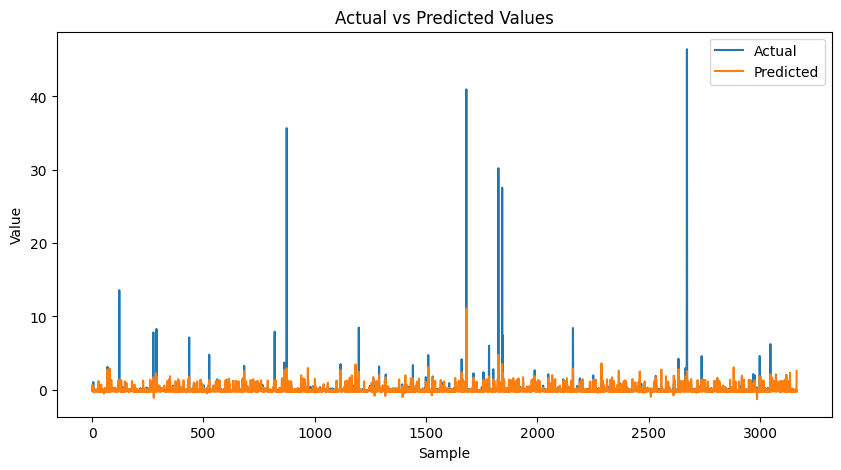

In [18]:
# Visualize predictions
plt.figure(figsize=(10, 5))
plt.plot(y_val.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.show()